##### Import statements

In [2]:
import pandas as pd
from utils import create_words_frequency, generate_word_cloud, create_tfidf, create_bow

##### Load input dataset

In [3]:
df = pd.read_csv(
	"data/input/forbes-news.csv",
	sep=";",
	parse_dates=[ "date"]
)

In [4]:
df.head( 5)

,id,date,title,description
0,content_65f361c1b92b13284673a54e,2024-03-14 21:02:01.835000+00:00,How Tax-Efficient Is Your Retirement Planning ...,"When you think about minimizing taxes, you’re ..."
1,content_65e76b4591c2e55bdba4a172,2024-03-14 20:39:32.491000+00:00,Can We Age Well If We Keep Ignoring Healthy Ag...,"For many, there is a belief that aging well is..."
2,content_65f35013cba7d730418de79e,2024-03-14 20:27:49.438000+00:00,This Week In Credit Card News: Elon Musk’s X M...,What took place this week in the credit card a...
3,content_65f353c02960e95df7fab522,2024-03-14 20:22:30.477000+00:00,Supplementary Review: Build-A-Bear Workshop (B...,Fiscal 2023 Q4 revenues rose 2.9% year-over-ye...
4,content_65f350902960e95df7f878a4,2024-03-14 19:33:52.235000+00:00,3 Bullish Signals Flashing For Red-Hot Retail ...,Retail stock Gap (GPS) has been red-hot in the...


In [5]:
df.describe()

,id,date,title,description
count,89993,89993,89993,89912
unique,89882,NaN,88842,88558
top,content_5cad565f9757fb00086f09b2,NaN,Closed Alert,What took place this week in the credit card a...
freq,2,NaN,108,241
mean,NaN,2020-12-12 22:42:58.041637632+00:00,NaN,NaN
min,NaN,2018-01-01 16:34:00+00:00,NaN,NaN
25%,NaN,2019-09-06 18:45:00+00:00,NaN,NaN
50%,NaN,2020-10-02 11:10:30.748999936+00:00,NaN,NaN
75%,NaN,2022-02-17 13:58:37.039000064+00:00,NaN,NaN
max,NaN,2024-03-14 21:02:01.835000+00:00,NaN,NaN


##### Identifying missing date

In [6]:
df[ df[ "date"].isnull()]

,id,date,title,description


##### Drop rows with missing date

In [7]:
df = df.dropna( subset=[ "date"])

##### Identifying duplicate rows

In [8]:
df[ df.duplicated()]

,id,date,title,description
95,content_65d8e493a29fad76c2682753,2024-03-11 12:58:10.356000+00:00,Want To Own A Piece Of A Picasso? Fractional O...,One of the biggest ways that the investment la...
3125,content_654171f35267f72847e70d37,2023-11-03 20:17:20.051000+00:00,How You Can Take Advantage Of Your Employee St...,Discover the key challenges employees face wit...
3285,content_653fb77316a8387acdb8d586,2023-10-31 11:00:00+00:00,How Input Financing Can Help Farmers Better Ma...,Farmers need a reliable option that provides t...
4075,content_651825da9686ad7bdaf8f0ef,2023-09-30 15:07:08.297000+00:00,Bullion Hits The Skids As Investors Dump $900 ...,But experts say there’s reason to be optimisti...
5255,content_64dd97259b428672a5a25e0d,2023-08-17 12:00:00+00:00,State Street Stock Has A 45% Upside To Its Pre...,The stock price has suffered over the last fiv...
...,...,...,...,...
84402,content_5bb1102464aaf93e2ca3d56d,2018-09-30 18:14:00+00:00,Slimming Down Portfolio,"In this environment, the prices on our preferr..."
86462,content_5b79893264aaf93ef039e99e,2018-08-19 17:28:00+00:00,Global Information Security Spending To Exceed...,Worldwide spending on information security is ...
86712,content_5b71e72164aaf942a5e2f448,2018-08-14 05:25:00+00:00,How To Use Web Search Trends In Your Fundament...,Alternative data is a hot topic these days. Fr...
87402,content_5b5e74a164aaf976f615ecdb,2018-07-30 02:46:00+00:00,China Startups Brace For 'Capital Winter' As V...,"As China seeks to contain financial risks, one..."


##### Drop duplicate rows

In [9]:
df = df.drop_duplicates()

##### Identifying missing fields

In [10]:
df[ df.isnull().any( axis=1)]

,id,date,title,description
2523,content_65660072bc8531d6a3d1f315,2023-11-28 14:59:17.257000+00:00,Bad Bunny On His Music Career Inspiring Him To...,NaN
2524,content_6565fe1fbc8531d6a3796d55,2023-11-28 14:43:03.630000+00:00,Bad Bunny | Exclusive Full Forbes Interview,NaN
4003,content_651c51f36411c686bce07cf8,2023-10-03 17:33:31.012000+00:00,Sam Bankman-Fried's Feud Trial Begins Today. H...,NaN
4576,content_6500a13d0f30efe65ed984e2,2023-09-12 17:34:53+00:00,In Pictures: The 25 Best Places To Enjoy Your ...,NaN
5708,content_64c856bb2c878a5a89416dd8,2023-08-01 00:41:02.025000+00:00,patti-export-loop-clipcut-final-2,NaN
...,...,...,...,...
85345,content_5b913f7264aaf93e2ca383ae,2018-09-12 13:29:56.137000+00:00,2018 Best Regarded Companies,NaN
85375,content_5b918d5e64aaf93e2ca38573,2018-09-11 19:04:26.509000+00:00,Inside the Hotel Bel-Air's Presidential Suite,NaN
86050,content_5b589d4d64aaf976f615df1c,2018-08-28 13:39:11.212000+00:00,The Best Retirement Place In Each State,NaN
88200,content_5b3c854f64aaf9287cf3983c,2018-07-11 16:46:48.005000+00:00,Volkswagen T-Roc,NaN


##### Filling missing fields

In [11]:
df = df.fillna( "")

##### Create a unified text of title and description of news *by concatenating them*

In [13]:
df[ "text"] = df[ "title"] + ", " + df[ "description"]

##### Textual Feaures

In [14]:
features_tfidf, tfidf_vec = create_tfidf( df, feature_column="text", max_feature_size=5000)

In [15]:
features_tfidf_names = tfidf_vec.get_feature_names_out()

features_tfidf_names

array(['0k', '0m', '1q', ..., 'zoom', 'zuckerberg', 'zynga'], dtype=object)

In [16]:
tfidf_sorted_table = create_words_frequency( features_tfidf, features_tfidf_names)

tfidf_sorted_table.head( 20)

,Top Words,Counts
0,stock,1822.970998
1,market,1395.492709
2,new,1232.349967
3,year,1201.326796
4,stocks,1134.073450
5,tax,990.967728
6,financial,950.090329
7,investors,935.813832
8,bitcoin,894.797113
9,company,865.594685


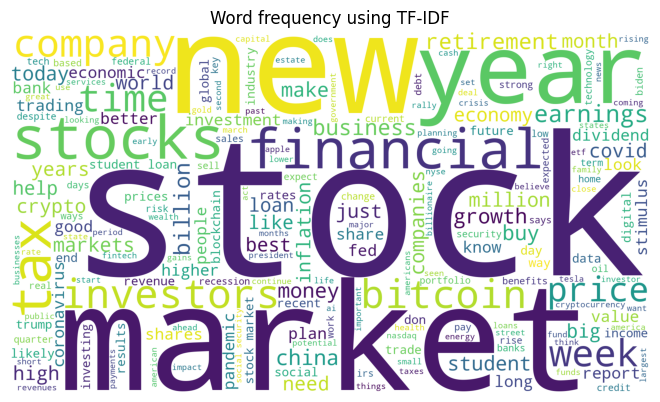

In [17]:
generate_word_cloud( tfidf_sorted_table, "Word frequency using TF-IDF")

In [18]:
features_bow, bow_vec = create_bow( df, feature_column="text", max_feature_size=5000)

In [19]:
features_bow_names = bow_vec.get_feature_names_out()

features_bow_names

array(['0k', '0m', '1q', ..., 'zoom', 'zuckerberg', 'zynga'], dtype=object)

In [20]:
bow_sorted_table = create_words_frequency( features_bow, features_bow_names)

bow_sorted_table.head( 20)

,Top Words,Counts
0,stock,22959
1,market,12808
2,year,11247
3,new,11212
4,stocks,9301
5,tax,8728
6,company,7641
7,financial,7629
8,price,7242
9,investors,7134


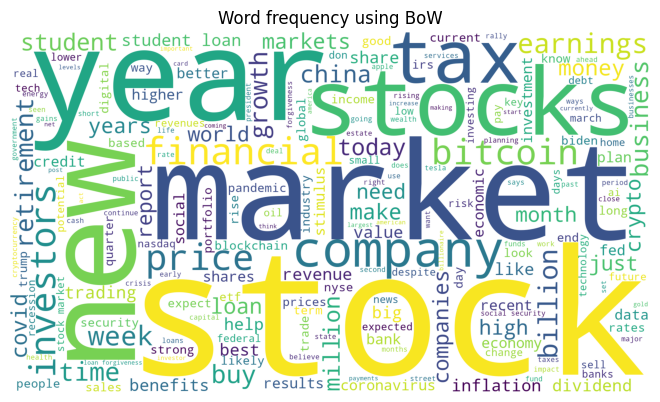

In [21]:
generate_word_cloud( bow_sorted_table, "Word frequency using BoW")

##### Creating new dataframe with clean data

In [22]:
new_df = df[ [ "date", "text"]]

new_df = new_df.sort_values( "date")

new_df.head( 5)

,date,text
89992,2018-01-01 16:34:00+00:00,How Wall Street Got It So Wrong On Stocks Last...
89991,2018-01-01 20:10:00+00:00,"The U.S. Economy in 2018, North Korea And The ..."
89990,2018-01-02 21:55:00+00:00,"Top Apps For Keeping New Year's Resolutions, T..."
89989,2018-01-04 17:45:00+00:00,The American Blogger Making Six-Figures While ...
89988,2018-01-04 20:14:00+00:00,Almost Impossible To Find A Bear On Amazon Sto...


In [23]:
new_df.to_csv( "data/result/forbes-data.csv", sep=";", index=False)